Airbnb scraper by APIFY
https://apify.com/dtrungtin/airbnb-scraper

## Dataset structure

Here we are dealing with database with few columns (we specified excel-friendly format). I suppose you can get more information and complex dataset by changing that option

This dataset was extracted on **08-June-2023** and the scrape period was **6 months**

`dataset_airbnb-scraper_2023-06-08_14-57-41-189.json`

|Column|Type|Description|
|------|----|-----------|
|url|str|URL of the listing|
|name|str|Name of the listing|
|stars|float|Star grading of the listing|
|numberOfGuests|int|Max number of occupants|
|address|str|City, State, Country|
|roomType|str|Type of the listing (e.g., Full apartment, house)|
|location|dict|`{lat, lng}`|
|reviews|list||
|pricing|dict|Dictionary containing currency, rate, etc|
|photos|list|URL's with photos of the listing|
|primaryHost|dict|Details of the host|
|additionalHosts|list|More Details about the host|
|isHostedBySuperhost|bool|Is the host SuperHost?|
|isAvailable|bool|Is the listing Available?|
|calendar|list|List with pairs of values `{Available, Date}`|
|occupancyPercentage|float|Percentage of occupancy in the specified period|

* Table made with the information extracted from the `preliminar.ipynb` notebook 

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_json('dataset_airbnb-scraper_2023-06-15_04-09-43-538.json')
data.columns

Index(['url', 'name', 'stars', 'numberOfGuests', 'address', 'roomType',
       'location', 'reviews', 'pricing', 'photos', 'primaryHost',
       'additionalHosts', 'isHostedBySuperhost', 'isAvailable', 'calendar',
       'occupancyPercentage'],
      dtype='object')

In [9]:
df = data[['name', 'stars', 'numberOfGuests', 'roomType', 'location', 'pricing',
            'isHostedBySuperhost', 'occupancyPercentage']].copy()
df.head()

,name,stars,numberOfGuests,roomType,location,pricing,isHostedBySuperhost,occupancyPercentage
0,Fully Comfort Suite,4.89,6,Alojamiento entero: piso,"{'lat': 6.20913, 'lng': -75.57003}","{'rate': {'amount': 157, 'amountFormatted': '$...",True,25.63
1,Energy Spectacular Condo,4.73,5,Alojamiento entero: piso,"{'lat': 6.211, 'lng': -75.559}","{'rate': {'amount': 164, 'amountFormatted': '$...",False,2.51
2,"Parque Lleras King w/AC & Guest Friendly, 100 ...",4.37,10,Alojamiento entero: piso,"{'lat': 6.20702, 'lng': -75.56443}","{'rate': {'amount': 187, 'amountFormatted': '$...",False,35.68
3,CHIC HOUSE LOFT - Sanctuary in the City #2,4.78,10,Alojamiento entero: vivienda,"{'lat': 6.246, 'lng': -75.591}","{'rate': {'amount': 154, 'amountFormatted': '$...",True,27.14
4,Cabaña en Santa Elena / Medellín,4.81,2,Granja,"{'lat': 6.20326, 'lng': -75.53043}","{'rate': {'amount': 163, 'amountFormatted': '$...",False,5.03


In [10]:
data.location[0]

{'lat': 6.20913, 'lng': -75.57003}

In [11]:
def typeofproperty(p):
    if 'hotel' in p:
        return 'hotel'
    elif 'habit' in p or 'piso' in p or 'loft' in p or 'privada' in p or 'apartamento' in p or 'apto. residencial' in p:
        return 'apartamento'
    elif 'casa' in p or 'granja' in p or 'villa' in p or 'adosado' in p:
        return 'casa'
    elif 'entero' in p and 'vivienda' in p:
        return 'casa'



df['pricepernight'] = df['pricing'].apply(lambda x: x['rate']['amount'])
df['propertyType'] = df.roomType.apply(typeofproperty)

df['superhost']  = df.isHostedBySuperhost.apply(lambda x: 1 if x == True else 0)
df['latitude'] = df.location.apply(lambda x: x['lat'])
df['longitude'] = df.location.apply(lambda x: x['lng'])
df.drop(columns=['pricing', 'roomType', 'location', 'isHostedBySuperhost'], inplace=True)
df

,name,stars,numberOfGuests,occupancyPercentage,pricepernight,propertyType,superhost,latitude,longitude
0,Fully Comfort Suite,4.89,6,25.63,157,apartamento,1,6.20913,-75.57003
1,Energy Spectacular Condo,4.73,5,2.51,164,apartamento,0,6.21100,-75.55900
2,"Parque Lleras King w/AC & Guest Friendly, 100 ...",4.37,10,35.68,187,apartamento,0,6.20702,-75.56443
3,CHIC HOUSE LOFT - Sanctuary in the City #2,4.78,10,27.14,154,casa,1,6.24600,-75.59100
4,Cabaña en Santa Elena / Medellín,4.81,2,5.03,163,None,0,6.20326,-75.53043
...,...,...,...,...,...,...,...,...,...
1204,"23th high floor.poblado location, in Medellin",4.88,3,100.00,55,apartamento,0,6.21602,-75.56780
1205,"Laureles, Medellin! Wifi 300MBPS",4.80,4,0.00,57,apartamento,1,6.24261,-75.60317
1206,Big apartment in the middle of poblado,4.75,6,8.04,55,casa,0,6.21166,-75.57414
1207,"Modern&Spacious 3'bedr apt, in perfect location",4.97,6,31.16,54,apartamento,1,6.24866,-75.59648


In [14]:
df.describe()
    

,stars,numberOfGuests,occupancyPercentage,pricepernight,superhost,latitude,longitude
count,1080.000000,1209.000000,1209.000000,1209.000000,1209.000000,1209.000000,1209.000000
mean,4.784056,4.170389,26.087039,127.334988,0.479735,6.206485,-75.569193
std,0.193218,2.583202,25.907068,96.150335,0.499796,0.026394,0.015889
min,3.500000,1.000000,0.000000,50.000000,0.000000,5.873290,-75.694700
25%,4.700000,2.000000,5.030000,65.000000,0.000000,6.200000,-75.573000
50%,4.820000,4.000000,18.090000,90.000000,0.000000,6.208510,-75.567640
75%,4.920000,5.000000,39.200000,144.000000,1.000000,6.212040,-75.563890
max,5.000000,16.000000,100.000000,500.000000,1.000000,6.260850,-75.472810


In [15]:
df.corr()

/var/folders/w3/99h1kkws5yj6c5ys1nc854gc0000gn/T/ipykernel_13972/1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,stars,numberOfGuests,occupancyPercentage,pricepernight,superhost,latitude,longitude
stars,1.000000,-0.029650,0.090068,0.036964,0.421232,-0.015591,0.025999
numberOfGuests,-0.029650,1.000000,0.055252,0.599661,-0.177496,-0.264480,0.071104
occupancyPercentage,0.090068,0.055252,1.000000,-0.133949,0.063160,-0.033653,-0.000471
pricepernight,0.036964,0.599661,-0.133949,1.000000,-0.167271,-0.207553,0.178706
superhost,0.421232,-0.177496,0.063160,-0.167271,1.000000,0.162519,-0.056738
latitude,-0.015591,-0.264480,-0.033653,-0.207553,0.162519,1.000000,-0.101320
longitude,0.025999,0.071104,-0.000471,0.178706,-0.056738,-0.101320,1.000000


In [16]:
df.propertyType.value_counts()

apartamento    1083
casa             64
hotel            53
Name: propertyType, dtype: int64

<Axes: >

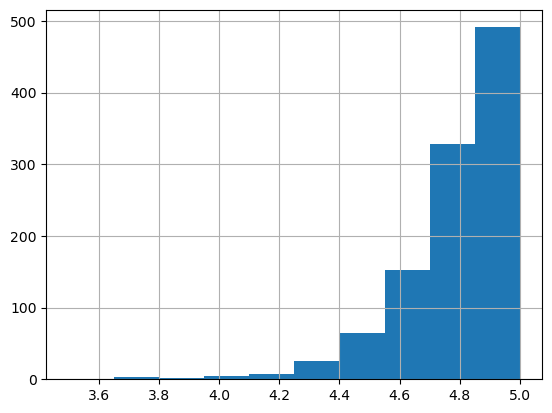

In [17]:
df.stars.hist()

<Axes: >

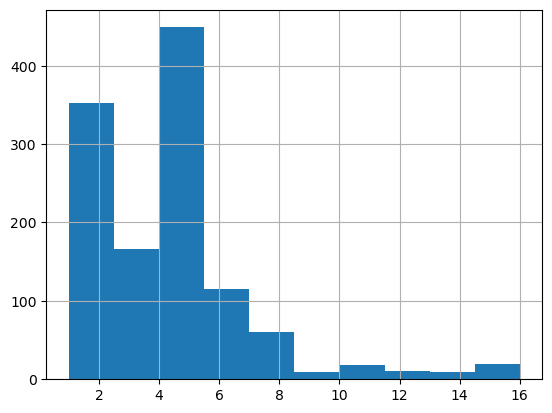

In [18]:
df.numberOfGuests.hist()

<Axes: >

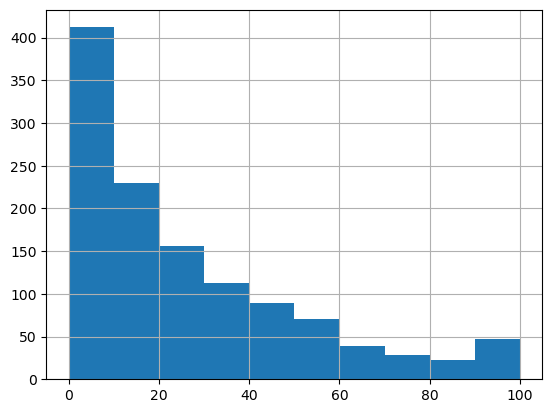

In [19]:
df.occupancyPercentage.hist()

<Axes: >

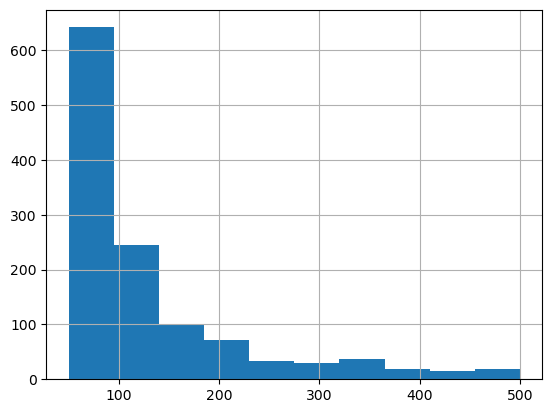

In [20]:
df.pricepernight.hist()

<Axes: >

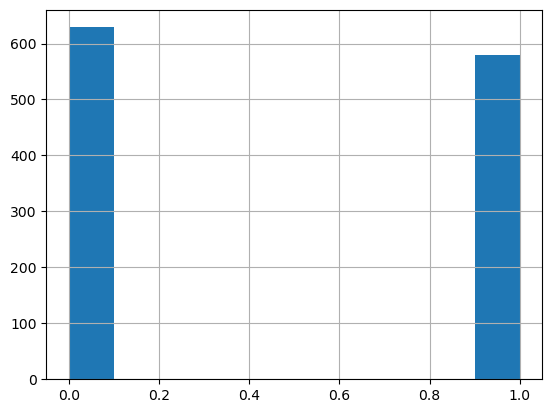

In [21]:
df.superhost.hist()

In [28]:
highoccup = data[data.occupancyPercentage > 80]
highoccup.head(2)

,url,name,stars,numberOfGuests,address,roomType,location,reviews,pricing,photos,primaryHost,additionalHosts,isHostedBySuperhost,isAvailable,calendar,occupancyPercentage
8,https://www.airbnb.com/rooms/48565412,"Cerca a provenza, último piso",4.62,6,"Medellín, Antioquia, Colombia",Alojamiento entero: piso,"{'lat': 6.1974, 'lng': -75.56244}",[],"{'rate': {'amount': 179, 'amountFormatted': '$...","[{'caption': '', 'pictureUrl': 'https://a0.mus...","{'id': 232415002, 'firstName': 'Propiedades Y ...",[],False,1.0,"[{'available': False, 'date': '2023-06-15'}, {...",100.0
14,https://www.airbnb.com/rooms/31169683,Poblado Waterfall Penthouse,NaN,8,"Medellín, Antioquia, Colombia",Alojamiento entero: piso,"{'lat': 6.20882, 'lng': -75.57433}",[],"{'rate': {'amount': 160, 'amountFormatted': '$...",[{'caption': 'Jacuzzi with custom waterfall fo...,"{'id': 56427964, 'firstName': 'James', 'isSupe...","[{'id': 446836447, 'firstName': 'Medellin Conc...",False,1.0,"[{'available': False, 'date': '2023-06-15'}, {...",100.0


In [22]:
import folium
import branca

# Create a map centered at an initial point
map = folium.Map(location=[6.225, -75.5812], zoom_start=14)

# Create a colormap for the color coding
colormap = branca.colormap.linear.YlOrRd_09.scale(df.pricepernight.min(), df.pricepernight.max())


for i, row in df.iterrows():
    #folium.Marker([row['latitude'], row['longitude']]).add_to(map)
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']], radius=5,
        color=colormap(row['pricepernight']),
        fill=True,
        fill_color=colormap(row['pricepernight']),
        fill_opacity=0.7
    ).add_to(map)

map


ModuleNotFoundError: No module named 'folium'